## MMC - L7 - Kacper Marchlewicz - 310195

# Zadanie 3
Zadanie polega na wyznaczeniu niepewności pomiaru płytki. Zaimplementowano model Monte Carlo zgodnie ze wzorem podanym w poleceniu. <br>
Zmienne losowe X są o różnych rozkładach, takich jak: t-sudenta, gausssa, równomierny, arcus sinus, trapezowy. <br>
Przygotowano następujące funkcje rozkładów i ekseprymentu Monte Carlo:

In [3]:
import random 
import math
import numpy as np
from scipy.stats import norm, t
from matplotlib import pyplot as plt

def generate_t_student(micro, sigma, v):
    num = t.rvs(v, micro, sigma, size=1)[0]
    return num

def generate_uniform(a, b):
    return random.uniform(a,b)

def generate_gauss(micro, sigma):
    return random.normalvariate(micro, sigma)

def generate_arc_sin(a, b):
    r = random.uniform(0,1)
    eta = ((a+b)/2) + ((b-a)/2)*math.sin(2*math.pi)*r
    return eta

def generate_trapezoid(a, b, d):
    r_1 = random.uniform(0,1)
    r_2 = random.uniform(0,1)
    eta = a + ((b-a)/2)*((1+d)*r_1 + (1-d)*r_2)
    return eta

def calculate_error(K):
    X1 = generate_t_student(50000623, 25, 18)
    X2 = generate_t_student(215, 6, 24)
    X3 = generate_t_student(0, 4, 5)
    X4 = generate_t_student(0, 7, 8)
    X5 = generate_uniform(9.5*pow(10,-6), 1.35*pow(10,-5))
    X6 = generate_gauss(-0.1, 0.2)
    X7 = generate_arc_sin(-0.5, 0.5)
    X8 = generate_trapezoid(-1*pow(10, -6), 1*pow(10,-6), 1*pow(10,-7))
    X9 = generate_trapezoid(-0.05, 0.05, 0.025)
    Y = X1 + X2 + X3 + X4 - X1*(X8*(X6 + X7) + X5*X9) - K
    return Y

Następniew wykonano 100 tys. eksperymentów. Obliczono estymator, odchylenie standardowe estymatora i rozproszenie dla wartości p=0,99 zgodnie z podanymi w poleceniu wzorami:

Estymator Y: 838.1096586106083
Odchylenie standardowe: 31.67370525088145
Przedział rozproszenia: [754.5968144834042, 922.4520108625293]


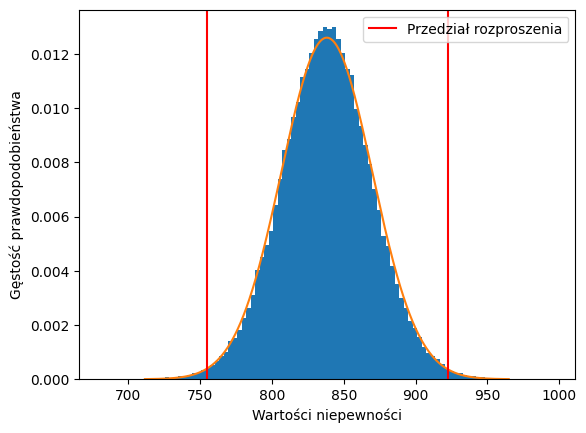

In [4]:
M = 100000
errors = []
for i in range(M):
    Y = calculate_error(50*pow(10,6))
    errors.append(Y)

estimator = np.mean(errors)
print(f'Estymator Y: {estimator}')

sum = 0
for error in errors:
    sum += (error - estimator)**2
std = math.sqrt((1/(M-1))*sum)
print(f'Odchylenie standardowe: {std}')

p = 0.99
q = int(p*M)
sorted_errors = sorted(errors)
r_star = int((M-q)/2)
y_min = sorted_errors[r_star]
y_max = sorted_errors[r_star+q]
dis = [y_min, y_max]
print(f'Przedział rozproszenia: {dis}')

x = np.linspace(estimator - 4*std, estimator + 4*std, 1000)
y = norm.pdf(x, estimator, std)
plt.hist(errors, bins=100, density=True)
plt.plot(x,y)
plt.axvline(dis[0], color='r', label='Przedział rozproszenia')
plt.axvline(dis[1], color='r')
plt.xlabel('Wartości niepewności')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend(loc='best')
plt.show()

Wyniki osiągnięty są bardzo podobne do wyników autorów artykułu. Autorzy osiągnęli:
<br>
Estymata = 838 <br>
Odchylenie standardowe = 36 <br>
Przedział rozproszenia = [745, 932] <br>
Wartość osiągniętej estymaty jest praktycznie identyczna. Widać różnicę w odchyleniu, co może wynikać z wykorzystywanej metody (autorzy stosowali GUF), co również wpływa na różnice w przedziale rozproszenia. 